In [1]:
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import random_unitary
from qiskit.visualization import array_to_latex, plot_histogram

Symulatory - Aer


In [2]:
# Wyświetlenie dostępnych backendów do symulacji:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

### Unitary Simulator

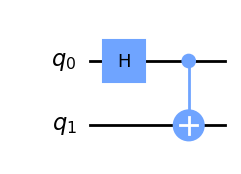

In [3]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw('mpl')

In [4]:
unitary_simulator = Aer.get_backend('unitary_simulator')
unitary_simulator_result = unitary_simulator.run(circuit).result()
unitary_simulator_result.data()

{'unitary': Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
             0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
           [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
           [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
           [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
             0.        +0.00000000e+00j,  0.        +0.00000000e+00j]],
          input_dims=(2, 2), output_dims=(2, 2))}

Wynikiem jest operator w reprezentacji macierzowej. Ładne wyświetlenie:

In [5]:
array_to_latex(unitary_simulator_result.get_unitary())

<IPython.core.display.Latex object>

In [6]:
circuit = QuantumCircuit(2)
circuit.set_unitary(random_unitary(4))
circuit.h(0)
circuit.cx(0, 1)
unitary_simulator_result = unitary_simulator.run(circuit).result()
unitary_simulator_result.get_unitary()

Operator([[-0.1083349 +0.41315308j,  0.37460348+0.09594058j,
            0.37748233+0.14879845j,  0.02358844+0.70911594j],
          [-0.18867313-0.59144407j,  0.43849923-0.44672208j,
           -0.20064093-0.24167797j, -0.17134373+0.30778315j],
          [-0.0060978 +0.1727846j ,  0.31110908-0.5511501j ,
            0.34592579+0.43985059j, -0.20986412-0.46084364j],
          [-0.53660815+0.33811897j,  0.21890963+0.10074088j,
            0.10864449-0.64168861j, -0.09072188-0.32841857j]],
         input_dims=(2, 2), output_dims=(2, 2))

### Statevector Simulator

In [7]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)

statevector_simulator = Aer.get_backend('statevector_simulator')
statevector_simulator_result = statevector_simulator.run(circuit).result()
statevector_simulator_result.data()

{'statevector': Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
              0.70710678+0.j],
             dims=(2, 2))}

Wynikiem jest wektor opisujący stan układu:

In [8]:
array_to_latex(statevector_simulator_result.get_statevector())

<IPython.core.display.Latex object>

### QASM Simulator  
Symuluje pomiary na rzeczywistym komputerze kwantowym (domyślnie na idealnym komputerze kwantowym - bez szumu czy dekoherencji.  

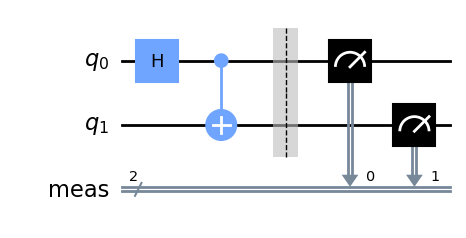

In [9]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()  # <--
circuit.draw('mpl')

In [10]:
qasm_simulator = Aer.get_backend('qasm_simulator')
qasm_simulator_result = qasm_simulator.run(circuit).result()
qasm_simulator_result.data()

{'counts': {'0x3': 515, '0x0': 509}}

Wynikiem jest słownik (Python dict). Można zwizualizować wyniki histogramem:

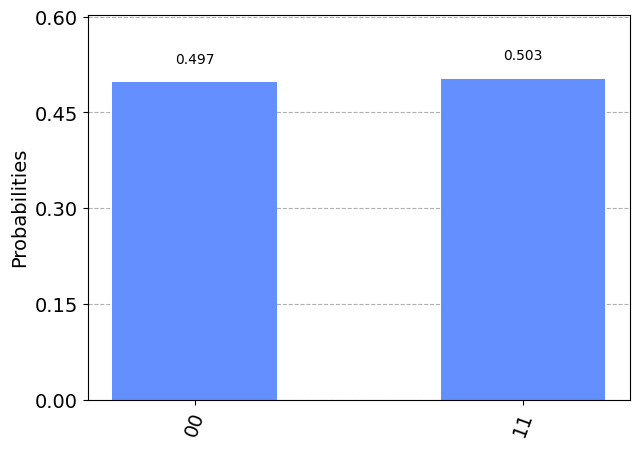

In [11]:
plot_histogram(qasm_simulator_result.get_counts())

With this simulator, you can simulate a executions in shots and get the value of each of them:

In [12]:
memory_result = qasm_simulator.run(circuit, shots=10, memory=True).result()
memory_result.get_memory(circuit)

['11', '11', '11', '00', '11', '11', '00', '11', '11', '00']